In [1]:
import numpy as np
import pandas as pd

In [2]:
YSL_export_16096040 = pd.read_csv("YSL_export_16096040.csv")
YSL_export2_16096121 = pd.read_csv("YSL_export2_16096121.csv")

/tmp/ipykernel_10719/3393795608.py:2: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  YSL_export2_16096121 = pd.read_csv("YSL_export2_16096121.csv")


In [3]:
df = pd.concat(
    [YSL_export_16096040, YSL_export2_16096121],
    axis=0,         # 按行拼接
    ignore_index=True  # 重新生成索引
)
print(f"✅ 合并完成，共 {len(df)} 条数据。")
df.to_csv("/root/ysl_project/df")

✅ 合并完成，共 515791 条数据。


In [4]:
df = df[["id", "url", "标题", "内容", "话题", "发表时间", "总互动量", "转发数", "评论数", "点赞数", "收藏数", "用户id", "小红书号", "用户属地", "性别", "出生年份", "关键词", "用户地址"]]

In [5]:
df.head(5)

,id,url,标题,内容,话题,发表时间,总互动量,转发数,评论数,点赞数,收藏数,用户id,小红书号,用户属地,性别,出生年份,关键词,用户地址
0,68f5ca3d000000000703a936,https://www.xiaohongshu.com/discovery/item/68f...,来了｜秋天得必备麂皮𝐈𝐂𝐀𝐑𝐈𝐍𝐎,Y家的麂皮棕配上大衣和毛衣真的高级松弛感拉满～ 包身采用奢华轻便菱形绗缝明线，饱满丝滑，触感...,YSL麂皮包|ysl|圣罗兰包包|ysl包包|皮质柔软细腻|质感绝绝子,2025-10-20 13:35:57,0,NaN,NaN,0.0,NaN,683be61b000000001b01933f,26189175504,NaN,NaN,NaN,麂皮|质感|包包|耐用度|明线,NaN
1,678109a0000000001703ec6f,https://www.xiaohongshu.com/discovery/item/678...,露背连体裤,#ysl圣罗兰 #YSL圣罗兰 #圣罗兰 #连体裤 #设计感连衣裙 #露背装 #小黑裙 #露...,ysl圣罗兰|YSL圣罗兰|圣罗兰|连体裤|设计感连衣裙|露背装|小黑裙|露背裙|气质小黑裙...,2025-01-10 19:50:56,1,0.0,0.0,1.0,0.0,63650414000000001f01912f,3825775568,云南,女,NaN,露背|圣罗兰|连体裤|小黑裙|穿搭,云南昆明
2,67ea7c7d000000001c03f9e1,https://www.xiaohongshu.com/discovery/item/67e...,YSL·潮流百搭款🕶️,YSL板材微翘猫眼款🕶️ 板材前框加上金属镜腿，ysl交织logo 镜片渐变色，超级好看时尚...,NaN,2025-03-31 19:29:01,0,NaN,NaN,0.0,NaN,661cf02f0000000003032095,11607493161,上海,NaN,NaN,潮流|百搭|板材|亚洲版|渐变色,NaN
3,6825ca24000000002002a3dd,https://www.xiaohongshu.com/discovery/item/682...,BELLA HADID IN圣罗兰,#ysl #超模 #骨子里的优雅 #时尚女魔头 #时尚 #时尚界宠儿 #时尚资讯 #寻找秀场...,骨子里的优雅|ysl|寻找秀场上的美|时尚界宠儿|圣罗兰穿搭|圣罗兰女装|时尚|圣罗兰|时尚...,2025-05-15 19:04:04,0,NaN,NaN,0.0,NaN,5ec21d9c0000000001005c39,464345235,云南,女,NaN,圣罗兰|时尚|穿搭|时尚界|时尚资讯,NaN
4,672473d9000000001a01e5db,https://www.xiaohongshu.com/discovery/item/672...,听说SKP所有品类打骨折？,ysl全品类参加活动， 力度开店以来最大一次 抓住机会哦 #ysl #新款分享 #skp活动...,ysl|新款分享|skp活动|SKP|ysl圣罗兰|yslniki|圣罗兰niki|圣罗兰hobo,2024-11-01 14:23:21,1,0.0,0.0,1.0,0.0,5fbaaaf1000000000100696a,1058502482,陕西,男,NaN,圣罗兰|品类|抓住机会|力度|新款,陕西西安


In [6]:
# 🔹 拼接内容、话题、关键词 → 新列 “完整内容”
df["完整内容"] = (
    df["内容"].fillna("") + "。" +
    "话题：" + df["话题"].fillna("") + "。" +
    "关键词：" + df["关键词"].fillna("")
).str.strip()


In [ ]:
import re
import pandas as pd

def clean_text_minimal(text: str) -> str:
    """仅删除 emoji 和邮箱，保留所有其它内容"""
    if pd.isna(text):
        return text
    s = str(text)

    # 去邮箱
    s = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '', s)

    # 去 emoji（匹配所有非BMP表情符号）
    emoji_pattern = re.compile("[\U00010000-\U0010FFFF]", flags=re.UNICODE)
    s = emoji_pattern.sub("", s)

    return s.strip()

# 示例应用
text_cols = ["内容","标题", "完整内容"]  # 你要清洗的列名
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_text_minimal)

print("✅ 文本清洗完成！示例：")
print(df[text_cols])

✅ 文本清洗完成！示例：
                        标题                                               完整内容
0               来了｜秋天得必备麂皮  Y家的麂皮棕配上大衣和毛衣真的高级松弛感拉满～ 包身采用奢华轻便菱形绗缝明线，饱满丝滑，触感...
1                    露背连体裤  #ysl圣罗兰 #YSL圣罗兰 #圣罗兰 #连体裤 #设计感连衣裙 #露背装 #小黑裙 #露...
2               YSL·潮流百搭款️  YSL板材微翘猫眼款️ 板材前框加上金属镜腿，ysl交织logo 镜片渐变色，超级好看时尚 ...
3        BELLA HADID IN圣罗兰  #ysl #超模 #骨子里的优雅 #时尚女魔头 #时尚 #时尚界宠儿 #时尚资讯 #寻找秀场...
4            听说SKP所有品类打骨折？  ysl全品类参加活动， 力度开店以来最大一次 抓住机会哦 #ysl #新款分享 #skp活动...
...                    ...                                                ...
515786  YSL hobo真实使用反馈|后悔了  后悔没早点入，上身真的太好看实用啦，虽然包包是替替，但日常使用超满足#ysl #ysl圣罗兰...
515787      38度的天气当然要背银色小包  没有女孩子能抗拒一只银色的YSL #圣罗兰 #中古包vintage。话题：圣罗兰|中古包vi...
515788          YSL云朵包开箱分享  #包包分享 #包包不重样 #最爱的包包 #ysl包包 #ysl #ysl圣罗兰 #YSL圣罗...
515789  ‼️‼️‼️Ysl卡包补货，现货秒发                   #留学 #uk。话题：留学|uk。关键词：卡包|补货|现货|留学
515790        备婚2.0 和RC锁死了  前前后后去试了jimmychoo/Christian Louboutin/ Roger Vi...

[515791 rows x 2 columns]


In [49]:
pip install matplotlib

Looking in indexes: http://mirrors.cloud.aliyuncs.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


📊 文本长度分布（前 10 条示例）：
count    515791.000000
mean        156.766832
std         108.923469
min           9.000000
25%          96.000000
50%         133.000000
75%         187.000000
90%         263.000000
95%         336.000000
max        1608.000000
Name: 文本长度, dtype: float64


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

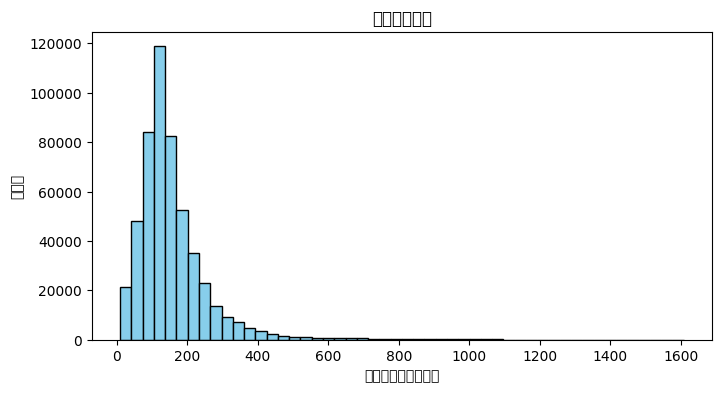


✅ 筛选完成：共 515791 条，删除 1199 条（0.23%）短文本。
示例：
                  标题                                               完整内容  文本长度
0         来了｜秋天得必备麂皮  Y家的麂皮棕配上大衣和毛衣真的高级松弛感拉满～ 包身采用奢华轻便菱形绗缝明线，饱满丝滑，触感...   266
1              露背连体裤  #ysl圣罗兰 #YSL圣罗兰 #圣罗兰 #连体裤 #设计感连衣裙 #露背装 #小黑裙 #露...   144
2         YSL·潮流百搭款️  YSL板材微翘猫眼款️ 板材前框加上金属镜腿，ysl交织logo 镜片渐变色，超级好看时尚 ...   122
3  BELLA HADID IN圣罗兰  #ysl #超模 #骨子里的优雅 #时尚女魔头 #时尚 #时尚界宠儿 #时尚资讯 #寻找秀场...   152
4      听说SKP所有品类打骨折？  ysl全品类参加活动， 力度开店以来最大一次 抓住机会哦 #ysl #新款分享 #skp活动...   160


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: 计算“完整内容”列的长度 ===
df["文本长度"] = df["完整内容"].astype(str).apply(len)

# === Step 2: 查看长度分布情况 ===
print("📊 文本长度分布（前 10 条示例）：")
print(df["文本长度"].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]))

# 可视化分布
plt.figure(figsize=(8,4))
plt.hist(df["文本长度"], bins=50, color="skyblue", edgecolor="black")
plt.title("文本长度分布")
plt.xlabel("文本长度（字符数）")
plt.ylabel("样本数")
plt.show()

# === Step 3: 筛掉长度 < 15？ 的短文本 ===
threshold = 15
filtered_df = df[df["文本长度"] >= threshold].copy()

# === Step 4: 记录筛选结果 ===
dropped_count = len(df) - len(filtered_df)
total_count = len(df)
print(f"\n✅ 筛选完成：共 {total_count} 条，删除 {dropped_count} 条（{dropped_count/total_count:.2%}）短文本。")
print("示例：")
print(filtered_df[["标题", "完整内容", "文本长度"]].head(5))

In [51]:
# 计算每列空值比例
null_summary = (
    df.isna()
    .mean()
    .sort_values(ascending=False)
    .to_frame("缺失比例")
    .assign(非空比例=lambda x: 1 - x["缺失比例"])
)

# 转换为百分比显示
null_summary["缺失比例"] = (null_summary["缺失比例"] * 100).round(2).astype(str) + "%"
null_summary["非空比例"] = (null_summary["非空比例"] * 100).round(2).astype(str) + "%"

print("✅ 各列缺失情况：")
display(null_summary.head(20))  # 显示前 20 列

✅ 各列缺失情况：


,缺失比例,非空比例
出生年份,93.13%,6.87%
用户地址,48.72%,51.28%
性别,42.42%,57.58%
用户属地,32.04%,67.96%
转发数,29.83%,70.17%
收藏数,29.73%,70.27%
评论数,28.16%,71.84%
小红书号,15.14%,84.86%
话题,9.82%,90.18%
标题,3.46%,96.54%


In [52]:
pip install seaborn

Looking in indexes: http://mirrors.cloud.aliyuncs.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


Using font family: ['WenQuanYi Zen Hei']


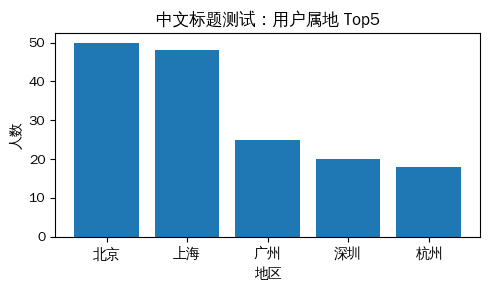

In [61]:
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams

# 1) 字体实际存在的路径（你已查到）
font_path = "/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc"
assert os.path.exists(font_path), "字体文件不存在，请检查路径！"

# 2) 显式将该字体文件加入 Matplotlib 的 fontManager（关键，不依赖系统别名）
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

# 3) 改全局默认：用“文泉驿正黑/WenQuanYi Zen Hei”，而不是 SimHei
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = [prop.get_name()]   # 应该打印出 'WenQuanYi Zen Hei'
rcParams['axes.unicode_minus'] = False

print("Using font family:", rcParams['font.sans-serif'])

# 4) 重新画一个“全中文”的新图来验证（注意：必须是新建图）
plt.figure(figsize=(5,3))
plt.title("中文标题测试：用户属地 Top5")
plt.bar(["北京","上海","广州","深圳","杭州"], [50,48,25,20,18])
plt.xlabel("地区")
plt.ylabel("人数")
plt.tight_layout()
plt.show()

==== 🧾 数据集概览 ====
总行数: 515791
总列数: 21

🆔 ID 唯一性检查: 共 515791 条, 唯一ID 515791 条, 重复 0 条.

🕒 发表时间范围:
最早: 2024-01-01 00:03:00  最新: 2025-10-27 22:32:00
📈 每月发帖数分布：


月份
2024-01    17834
2024-02    14459
2024-03    26246
2024-04    27661
2024-05    28895
2024-06    29239
2024-07    31477
2024-08    29093
2024-09    32505
2024-10    28877
Freq: M, Name: count, dtype: int64

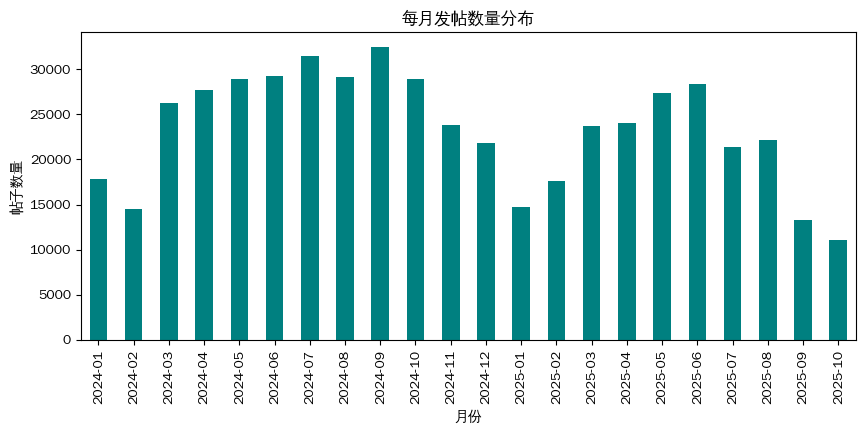


📊 总互动量 分布描述：
count    515791.000000
mean         12.509538
std         381.089239
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
90%           6.000000
95%          13.000000
max      160367.000000
Name: 总互动量, dtype: float64


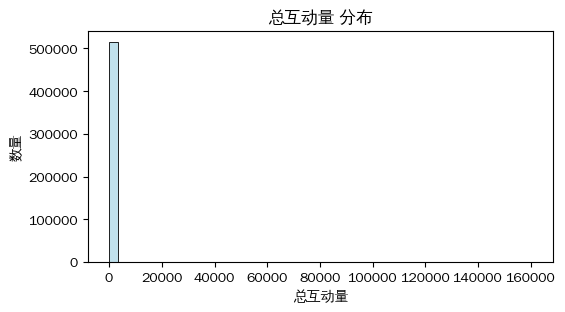


📊 转发数 分布描述：
count    361916.000000
mean          0.963251
std          19.969993
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
90%           1.000000
95%           2.000000
max        3625.000000
Name: 转发数, dtype: float64


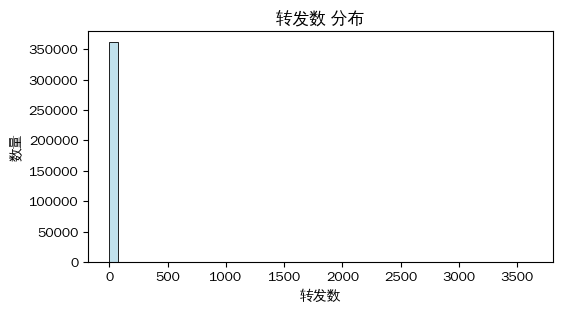


📊 评论数 分布描述：
count    370556.000000
mean          1.539004
std          46.975878
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
90%           2.000000
95%           4.000000
max       12332.000000
Name: 评论数, dtype: float64


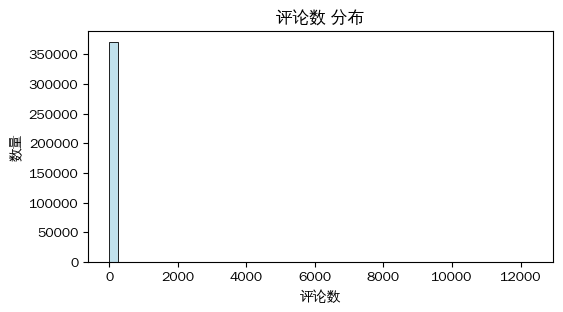


📊 点赞数 分布描述：
count    515184.000000
mean          9.195002
std         318.314033
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
90%           3.000000
95%           9.000000
max      143520.000000
Name: 点赞数, dtype: float64


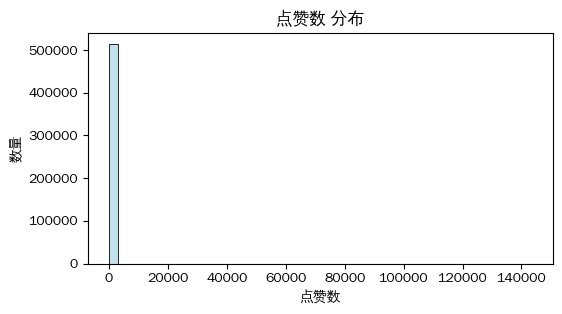


📊 收藏数 分布描述：
count    362472.000000
mean          2.196821
std          49.397433
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
90%           1.000000
95%           3.000000
max       11415.000000
Name: 收藏数, dtype: float64


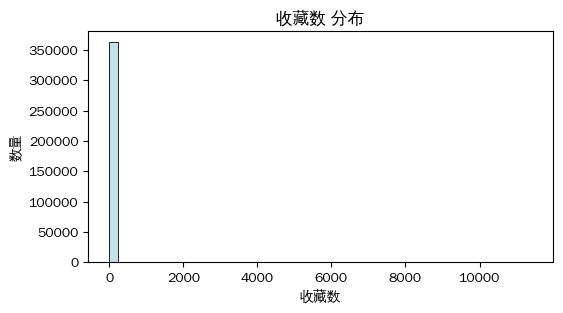


🌍 用户属地 Top10:


用户属地
广东    50819
上海    47742
四川    24578
浙江    20233
江苏    19668
福建    19160
北京    16641
山东    15043
湖南     9778
湖北     9351
Name: count, dtype: int64

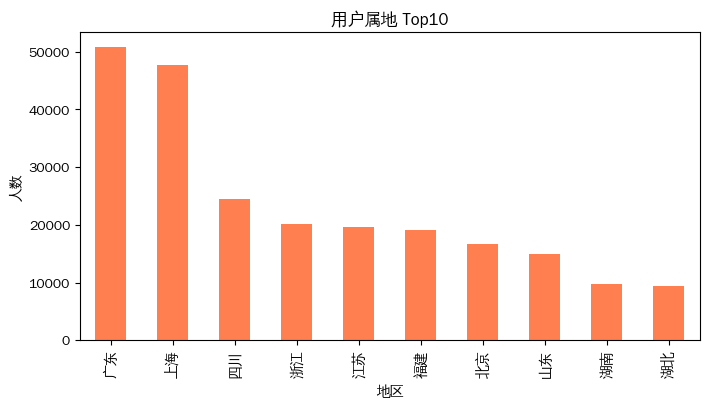


🚻 性别分布：


性别
女      248025
NaN    218806
男       47929
未知       1031
Name: count, dtype: int64

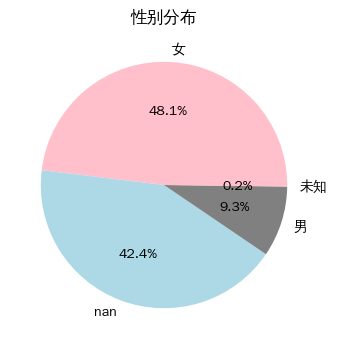


👶 出生年份分布：


出生年份
1177.0    1
1394.0    1
1503.0    3
1505.0    1
1523.0    1
1595.0    2
1665.0    1
1686.0    1
1717.0    1
1801.0    2
Name: count, dtype: int64

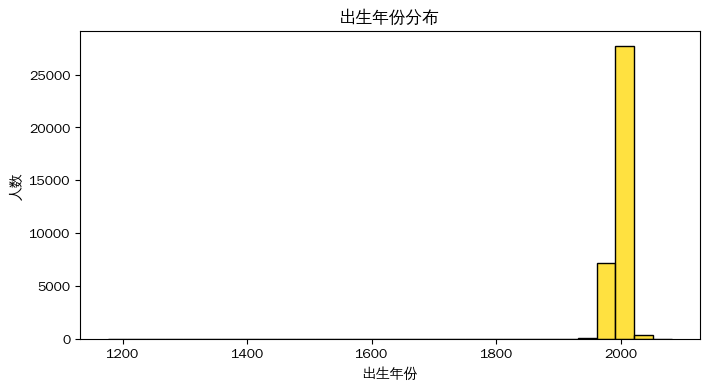


🏠 用户地址样本：
1          云南昆明
4          陕西西安
6          天津津南
8            中国
10         四川成都
15         广东广州
16    地球的某一片红薯地
17    地球的某一片红薯地
18           中国
20           上海
Name: 用户地址, dtype: object
非空比例: 51.28%


In [62]:
import seaborn as sns
print("==== 🧾 数据集概览 ====")
print(f"总行数: {len(df)}")
print(f"总列数: {len(df.columns)}\n")

# =============================
# 1️⃣ ID 唯一性
# =============================
total = len(df)
unique = df['id'].nunique()
duplicates = total - unique
print(f"🆔 ID 唯一性检查: 共 {total} 条, 唯一ID {unique} 条, 重复 {duplicates} 条.")
if duplicates > 0:
    dup_ids = df['id'].value_counts().loc[lambda x: x > 1]
    print("⚠️ 重复ID示例:\n", dup_ids.head())

# =============================
# 2️⃣ 发表时间分布
# =============================
if '发表时间' in df.columns:
    df['发表时间'] = pd.to_datetime(df['发表时间'], errors='coerce')
    print("\n🕒 发表时间范围:")
    print(f"最早: {df['发表时间'].min()}  最新: {df['发表时间'].max()}")
    print("📈 每月发帖数分布：")
    df['月份'] = df['发表时间'].dt.to_period('M')
    post_counts = df['月份'].value_counts().sort_index()
    display(post_counts.head(10))
    plt.figure(figsize=(10,4))
    post_counts.plot(kind='bar', color='teal', title='每月发帖数量分布')
    plt.xlabel('月份')
    plt.ylabel('帖子数量')
    plt.show()

# =============================
# 3️⃣ 互动量与四项互动指标分布
# =============================
engagement_cols = ['总互动量', '转发数', '评论数', '点赞数', '收藏数']
for col in engagement_cols:
    if col in df.columns:
        print(f"\n📊 {col} 分布描述：")
        print(df[col].describe(percentiles=[0.25,0.5,0.75,0.9,0.95]))
        plt.figure(figsize=(6,3))
        sns.histplot(df[col].dropna(), bins=50, color='lightblue', edgecolor='black')
        plt.title(f'{col} 分布')
        plt.xlabel(col)
        plt.ylabel('数量')
        plt.show()

# =============================
# 4️⃣ 用户属地分布
# =============================
if '用户属地' in df.columns:
    top_location = df['用户属地'].value_counts(dropna=True).head(10)
    print("\n🌍 用户属地 Top10:")
    display(top_location)
    plt.figure(figsize=(8,4))
    top_location.plot(kind='bar', color='coral')
    plt.title('用户属地 Top10')
    plt.xlabel('地区')
    plt.ylabel('人数')
    plt.show()

# =============================
# 5️⃣ 性别分布
# =============================
if '性别' in df.columns:
    print("\n🚻 性别分布：")
    gender_counts = df['性别'].value_counts(dropna=False)
    display(gender_counts)
    plt.figure(figsize=(4,4))
    gender_counts.plot(kind='pie', autopct='%.1f%%', colors=['pink','lightblue','gray'])
    plt.title('性别分布')
    plt.ylabel('')
    plt.show()

# =============================
# 6️⃣ 出生年份分布
# =============================
if '出生年份' in df.columns:
    print("\n👶 出生年份分布：")
    birth_counts = df['出生年份'].value_counts(dropna=True).sort_index()
    display(birth_counts.head(10))
    plt.figure(figsize=(8,4))
    sns.histplot(df['出生年份'].dropna(), bins=30, color='gold')
    plt.title('出生年份分布')
    plt.xlabel('出生年份')
    plt.ylabel('人数')
    plt.show()

# =============================
# 7️⃣ 用户地址分布
# =============================
if '用户地址' in df.columns:
    print("\n🏠 用户地址样本：")
    sample_addr = df['用户地址'].dropna().head(10)
    print(sample_addr)
    print(f"非空比例: {(df['用户地址'].notna().mean()*100):.2f}%")